In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing/housing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/california-housing/housing.csv")

In [4]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
X  = data.drop(['median_house_value'] , axis= 1)
y = data['median_house_value']

In [9]:
X_train, X_test, y_train , y_test = train_test_split(X,  y, test_size = 0.2)

In [10]:
train_data = X_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7056,-118.03,33.92,35.0,2108.0,405.0,1243.0,394.0,3.6731,<1H OCEAN,167000.0
19098,-122.62,38.24,33.0,1369.0,280.0,758.0,246.0,4.0341,<1H OCEAN,156500.0
7838,-118.17,33.90,12.0,3653.0,993.0,3215.0,854.0,2.8681,<1H OCEAN,114200.0
3832,-118.44,34.20,36.0,2698.0,623.0,1544.0,554.0,2.7375,<1H OCEAN,234900.0
7291,-118.22,33.98,18.0,1781.0,765.0,1913.0,702.0,1.2059,<1H OCEAN,255000.0
...,...,...,...,...,...,...,...,...,...,...
15806,-122.44,37.76,52.0,1968.0,472.0,784.0,430.0,3.3702,NEAR BAY,370000.0
8614,-118.38,33.87,21.0,4151.0,1018.0,2054.0,925.0,4.9821,<1H OCEAN,292900.0
18141,-122.05,37.34,34.0,2515.0,401.0,1079.0,399.0,7.7865,<1H OCEAN,423900.0
14827,-117.09,32.66,37.0,1232.0,330.0,1086.0,330.0,1.6389,NEAR OCEAN,114300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

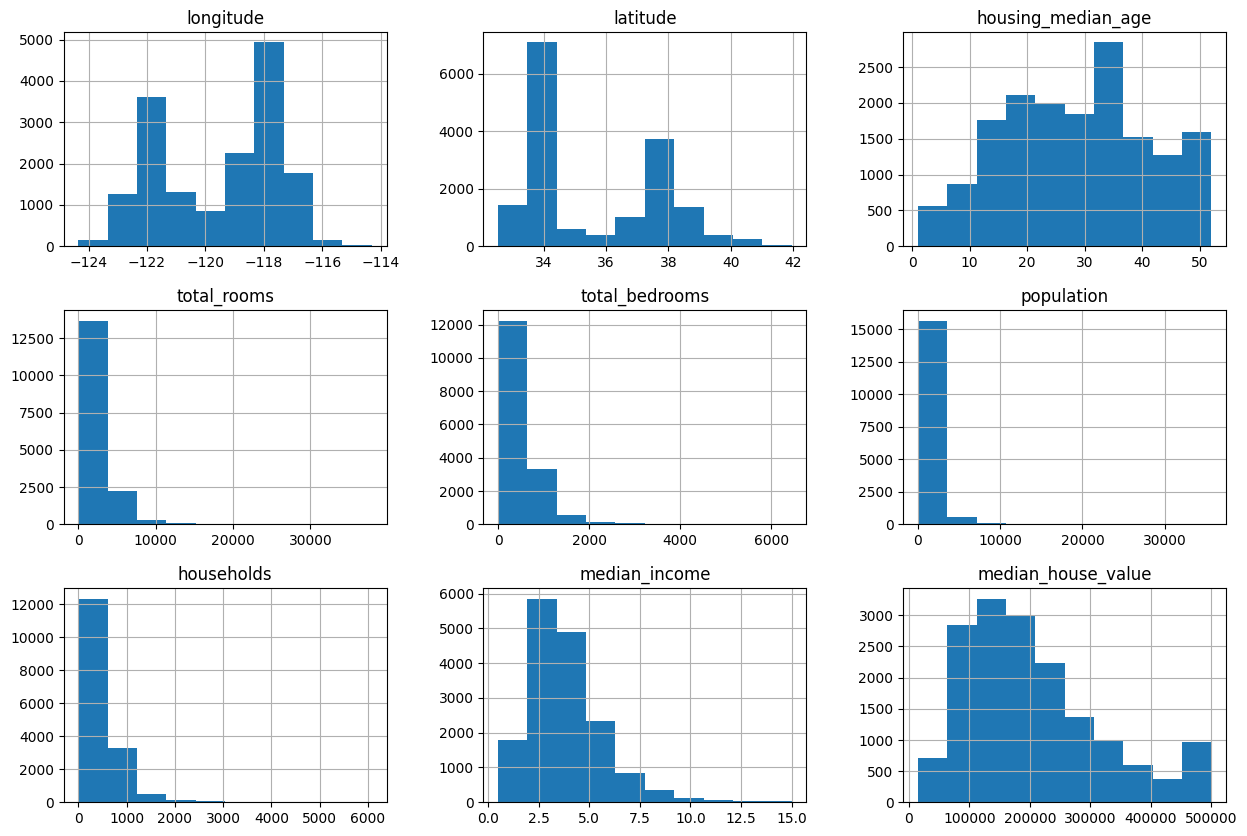

In [12]:
train_data.hist(figsize= (15,10))

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7056,-118.03,33.92,35.0,7.653969,6.006353,7.126087,5.978886,3.6731,<1H OCEAN,167000.0
19098,-122.62,38.24,33.0,7.222566,5.638355,6.632002,5.509388,4.0341,<1H OCEAN,156500.0
7838,-118.17,33.90,12.0,8.203578,6.901737,8.075894,6.751101,2.8681,<1H OCEAN,114200.0
3832,-118.44,34.20,36.0,7.900637,6.436150,7.342779,6.318968,2.7375,<1H OCEAN,234900.0
7291,-118.22,33.98,18.0,7.485492,6.641182,7.556951,6.555357,1.2059,<1H OCEAN,255000.0
...,...,...,...,...,...,...,...,...,...,...
15806,-122.44,37.76,52.0,7.585281,6.159095,6.665684,6.066108,3.3702,NEAR BAY,370000.0
8614,-118.38,33.87,21.0,8.331345,6.926577,7.628031,6.830874,4.9821,<1H OCEAN,292900.0
18141,-122.05,37.34,34.0,7.830426,5.996452,6.984716,5.991465,7.7865,<1H OCEAN,423900.0
14827,-117.09,32.66,37.0,7.117206,5.802118,6.991177,5.802118,1.6389,NEAR OCEAN,114300.0


In [15]:
import pandas as pd

# Assuming train_data is your DataFrame

# One-hot encode 'ocean_proximity' and replace boolean values with integers
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# Replace boolean values with integers explicitly without triggering the warning
train_data['ocean_proximity'] = train_data['ocean_proximity'].replace({True: 1, False: 0})
train_data = train_data.infer_objects(copy=False)


KeyError: 'ocean_proximity'

In [ ]:
train_data

In [ ]:
train_data.columns

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [ ]:
train_data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train , y_train = train_data.drop(['median_house_value'], axis = 1) , train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train , y_train)

In [ ]:
test_data

In [ ]:
test_data.columns


In [ ]:
import numpy as np
import pandas as pd

# Assuming X_test and y_test are your features and target variables respectively

test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

# One-hot encode 'ocean_proximity' and replace boolean values with integers
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# Replace boolean values with integers explicitly to avoid future warning
test_data['ocean_proximity'] = test_data['ocean_proximity'].replace({True: 1, False: 0})

# Use .infer_objects() to ensure correct data types without future warning
test_data = test_data.infer_objects()

# Calculate new features
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# Optionally, you can create a DataFrame df for visualization or further processing
df = pd.DataFrame(test_data)

# Ensure to assign the updated DataFrame back if you want to keep the changes
# test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
# df = df.replace({True: 1, False: 0})



In [ ]:
test_data

In [ ]:
X_test , y_test = test_data.drop(['median_house_value'] , axis = 1) , test_data['median_house_value']

In [ ]:
test_data

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
X_test.columns

In [ ]:
 y_test.columns

In [ ]:
reg.score(X_test_s , y_test)

In [ ]:
test_data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(X_train , y_train)

In [ ]:
forest.score(X_test , y_test)